## Linear Regression Ordinary Least Square Closed Form 

Here I implement a simple Linear Regression using the close form solution for linear regression , There can be multiple features but I used only a single feature, I used the dataset of housing prices from <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques">this</a> Kaggle Competetion.

The Closed form Solution for linear regression can be seen 

$$W^*=(\Phi^T \Phi)^{-1}\Phi^TY$$

Here $\Phi$ is the Feature Vector with size $m * p$
m is the number of element in the dataset and p is the number of features . Y is the target and $W^*$ is the predicted weight.

Here also Ones are added with the $\Phi$ so that our model can also use the intercept .




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util

# loading the dataset
data=pd.read_csv('dataset/train.csv')


Y=data['SalePrice']
X=data[['1stFlrSF']]

X.head()

,1stFlrSF
0,856
1,1262
2,920
3,961
4,1145


Populating the interactive namespace from numpy and matplotlib
<< DONE TRAINING  >>


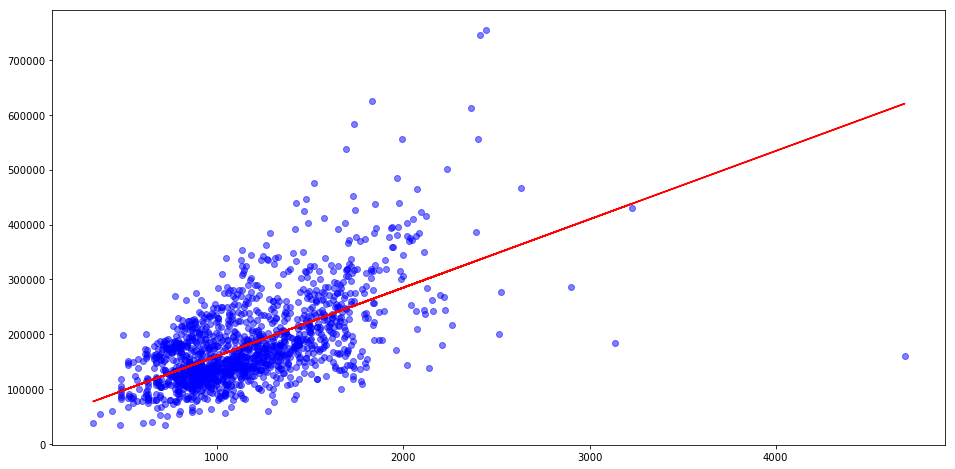

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

class linear_regression():
    def __init__(self):
        self.phi=None
        self.weights=None
        self.Y=None
        self.rmserr=100.0
    
    #transform feature Here we will add all our feature engineering for now we only add 1 for intercept
    def transform_features(self,x):
        return np.hstack((x,np.ones(x.shape[0]).reshape((len(x),1))))
    
    #fit the liniear regression model 
    def fit(self,X,Y,algo='ls'):
        self.phi=X.as_matrix()
        self.phi=np.hstack((self.phi,np.ones(X.shape[0]).reshape((len(X),1))))
        self.Y=Y.as_matrix()
        if algo=='ls':
            self.least_squared_fit()
    
    #lsfit
    def least_squared_fit(self):
        #phiT
        phi_t=self.phi.transpose()
        #(phiT*phi)
        temp_l=np.matmul(phi_t,self.phi)
        #inv(phiT*phi)
        phi_inv=np.linalg.inv(temp_l)
        #inv(phiT*phi)*phi
        temp_l_2=np.matmul(phi_inv,phi_t)
        #w=inv(phiT*phi)*phi*Y
        self.weights=np.matmul(temp_l_2,self.Y)
        #row vector to column vector weights
        self.weights=self.weights.reshape((self.weights.size,1))
        #calculate training rmse
        self.rmserr=self.rmse(self.phi,self.Y)
        print('<< DONE TRAINING  >>')

    #predict
    def predict(self,x):
        return np.matmul(x,self.weights);
    
    #calculate rmse for model
    def rmse(self,x,y):
        err=0.0
        for i in range(y.size):
            err+=(y[i]-self.predict(x[i]))**2
        err/=float(y.size)
        err=err**.5
        return err
    
    #print weights
    def print_weights(self):
        print(self.weights)

l=linear_regression()
l.fit(X,Y)
Xt=l.transform_features(X.as_matrix())
l.rmse(Xt,Y.as_matrix())


plt.scatter(X,Y, alpha=0.5,color='blue')
plt.plot(X,l.predict(Xt),'k',color='red')
plt.show()




In [3]:
#kaggle submission generate
test=pd.read_csv('dataset/test.csv')

x_test=test[['1stFlrSF']]
transformed_f=l.transform_features(x_test.as_matrix())
predictions=l.predict(transformed_f)

util.generate_kaggle_submission(test,predictions,"Id","SalePrice")

<img src="imgs/rmse1.png"/>